In [83]:
import scanpy as sc
import scvelo as scv
import numpy as np
import os
from celldreamer.paths import DATA_DIR
from anndata import AnnData as ad

Read dataset 

In [73]:
adata = scv.datasets.pbmc68k("../../project_folder/datasets/raw/pbmc68k.h5ad")
adata.layers["X_counts"] = adata.X.copy()

In [74]:
adata = adata[adata.layers["X_counts"].A.sum(1)>=5]
adata.layers["X_counts"].sum(1).min()

5.0

In [75]:
sc.pp.filter_genes(adata, min_cells=20)

Highly variable gene selection (counts)

Preprocess

In [76]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

In [77]:
sc.tl.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)

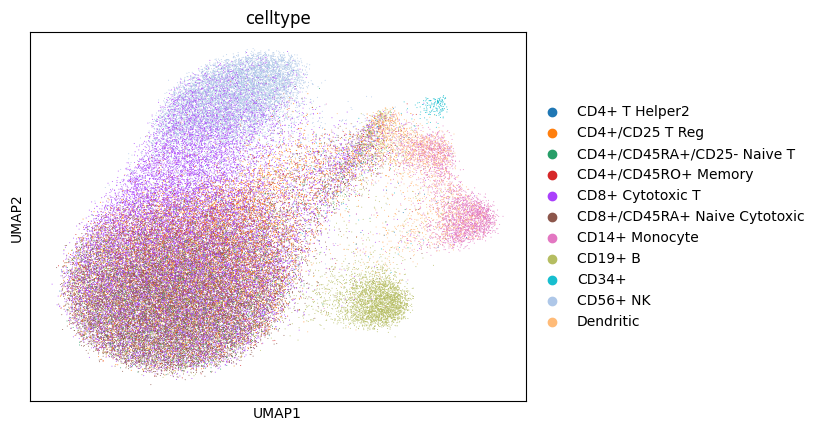

In [78]:
sc.pl.umap(adata, color=["celltype"])

## Train-test split

In [79]:
# Generate random indices for train and test sets
total_samples = adata.n_obs
train_frac = 0.7
train_size = int(total_samples * train_frac)
train_indices = np.random.choice(total_samples, size=train_size, replace=False)
test_indices = np.setdiff1d(np.arange(total_samples), train_indices)

# Separate data into train and test sets by indexing the Anndata object
train_adata = adata[train_indices, :]
test_adata = adata[test_indices, :]

## Save

In [80]:
sc.AnnData.write_h5ad(adata, DATA_DIR / "processed_full_genome" / "pbmc68k" / "pbmc68k.h5ad")

In [81]:
sc.AnnData.write_h5ad(train_adata, DATA_DIR / "processed_full_genome" / "pbmc68k" / "pbmc68k_train.h5ad")

In [82]:
sc.AnnData.write_h5ad(test_adata, DATA_DIR / "processed_full_genome" / "pbmc68k" / "pbmc68k_test.h5ad")

In [84]:
test_adata

View of AnnData object with n_obs × n_vars = 19758 × 9189
    obs: 'celltype'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'n_cells'
    uns: 'log1p', 'pca', 'neighbors', 'umap', 'celltype_colors'
    obsm: 'X_tsne', 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'spliced', 'unspliced', 'X_counts'
    obsp: 'distances', 'connectivities'